# PASCAL VOC 2012 Data View

## about the PASCAL VOC 2012 dataset

The PASCAL VOC 2012 dataset is a standard dataset for image segmentation, detection, localization, etc. It was released in 2012 and is still widely used today as a benchmark for computer vision tasks.

The dataset contains 20 object categories: aeroplane, bicycle, boat, bus, car, motorbike, train, bottle, chair, dining table, potted plant, sofa, TV/monitor, bird, cat, cow, dog, horse, sheep, and person. Each image in the dataset has pixel-level segmentation annotations, bounding box annotations, and object class annotations.

The PASCAL VOC 2012 dataset is split into three parts: train, validation, and test. The train set contains 1,464 images, the validation set contains 1,449 images, and the test set contains 1,456 images.

The PASCAL VOC 2012 dataset is a challenging dataset because the images are realistic and the objects are often occluded or in difficult poses. However, the dataset is well-organized and the annotations are high-quality.

In [1]:
import os
import cv2
import random
import shutil
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET 
print(os.listdir('VOC2012'))

['Annotations', 'ImageSets', 'JPEGImages', 'SegmentationClass', 'SegmentationObject']


# JPEGImages

IndexError: index 3 is out of bounds for axis 0 with size 3

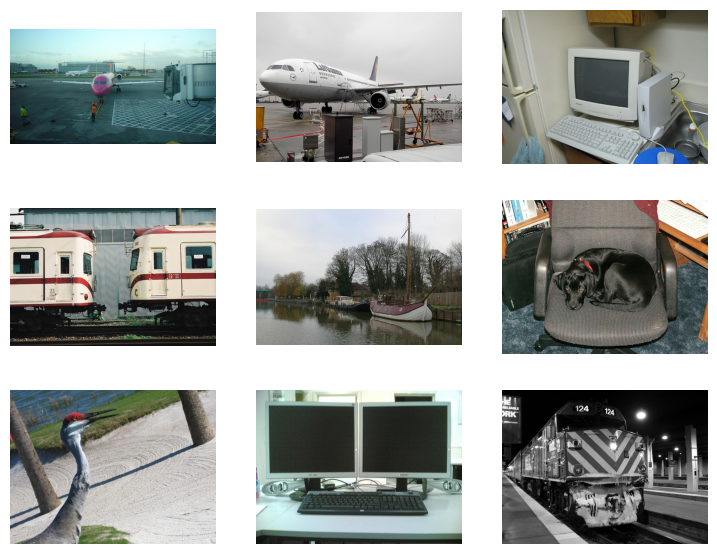

In [2]:
paths=[]
for dirname, _, filenames in os.walk('VOC2012/JPEGImages'):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
paths.sort()
fig, axs = plt.subplots(3,3,figsize=(9,7))
for i in range(12):
    r=i//3
    c=i%3
    img = plt.imread(paths[i+1])
    ax=axs[r][c].axis("off")
    ax=axs[r][c].imshow(img)
plt.show()

# SegmentationClass

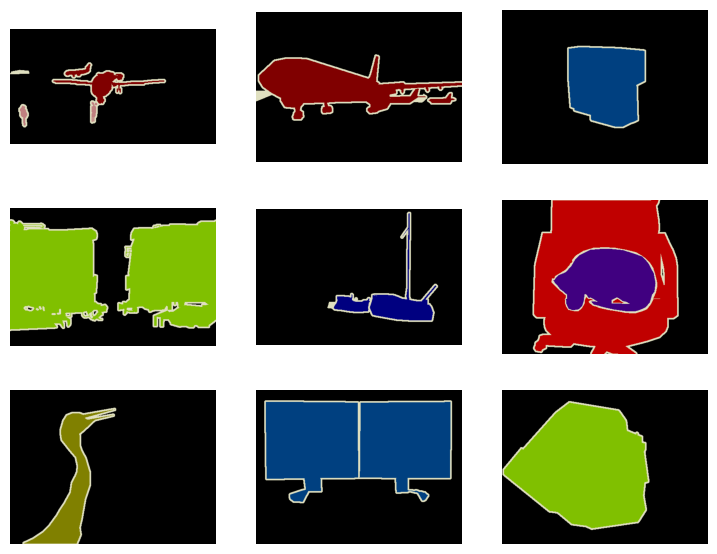

In [6]:
paths=[]
for dirname, _, filenames in os.walk('/kaggle/input/pascal-voc-2012/VOC2012/SegmentationClass'):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
paths.sort()        
fig, axs = plt.subplots(3,3,figsize=(9,7))
for i in range(9):
    r=i//3
    c=i%3
    img = plt.imread(paths[i])
    ax=axs[r][c].axis("off")
    ax=axs[r][c].imshow(img)
plt.show()

# SegmentationObject

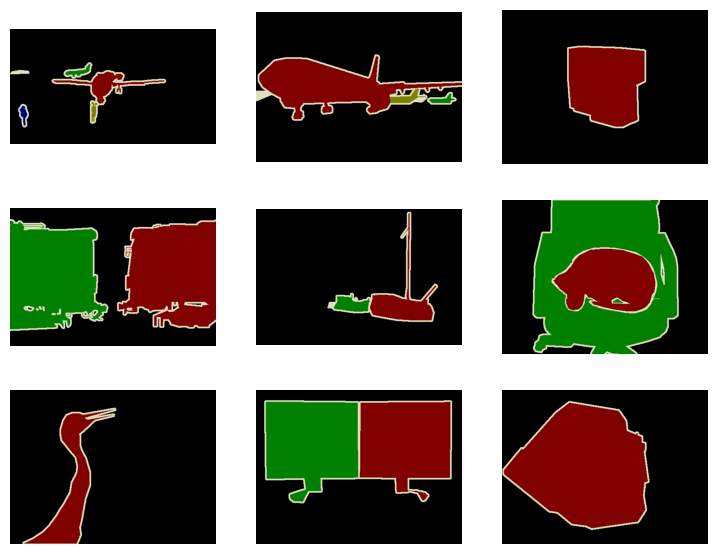

In [7]:
paths=[]
for dirname, _, filenames in os.walk('/kaggle/input/pascal-voc-2012/VOC2012/SegmentationObject'):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
paths.sort()        
fig, axs = plt.subplots(3,3,figsize=(9,7))
for i in range(9):
    r=i//3
    c=i%3
    img = plt.imread(paths[i])
    ax=axs[r][c].axis("off")
    ax=axs[r][c].imshow(img)
plt.show()

# Annotations

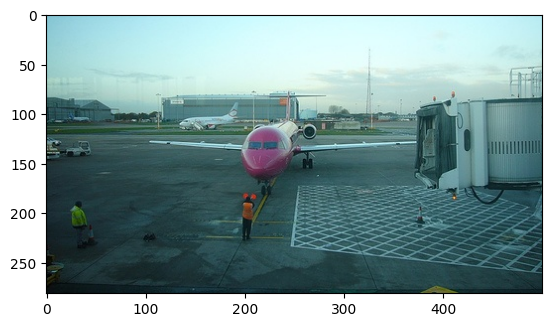

In [8]:
image=plt.imread('/kaggle/input/pascal-voc-2012/VOC2012/JPEGImages/2007_000032.jpg')
plt.imshow(image)
plt.show()

In [10]:
xml_path='/kaggle/input/pascal-voc-2012/VOC2012/Annotations/2007_000032.xml'

In [12]:
# Load the XML data
xml_data = """
<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>26</xmin>
			<ymin>189</ymin>
			<xmax>44</xmax>
			<ymax>238</ymax>
		</bndbox>
	</object>
</annotation>

"""


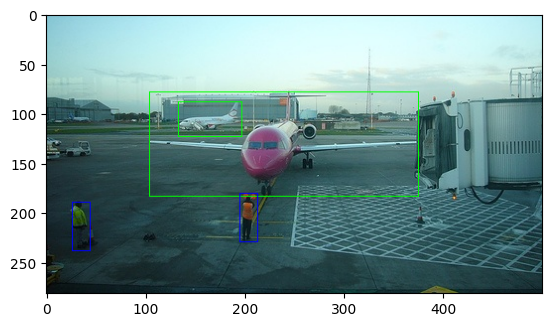

,filename,width,height,depth,object_name,object_pose,object_truncated,object_difficult,object_xmin,object_ymin,object_xmax,object_ymax
0,2007_000032.jpg,500,281,3,aeroplane,Frontal,0,0,104,78,375,183
1,2007_000032.jpg,500,281,3,aeroplane,Left,0,0,133,88,197,123
2,2007_000032.jpg,500,281,3,person,Rear,0,0,195,180,213,229
3,2007_000032.jpg,500,281,3,person,Rear,0,0,26,189,44,238


In [13]:
#root = ET.fromstring(xml_data)

tree = ET.parse(xml_path)
root = tree.getroot()

# Initialize lists to store data
data_dict = {
    'filename': [],
    'width': [],
    'height': [],
    'depth': [],
    'object_name': [],
    'object_pose': [],
    'object_truncated': [],
    'object_difficult': [],
    'object_xmin': [],
    'object_ymin': [],
    'object_xmax': [],
    'object_ymax': []
}

# Extract information from XML
filename = root.find("filename").text
width = int(root.find("size/width").text)
height = int(root.find("size/height").text)
depth = int(root.find("size/depth").text)

for obj_elem in root.findall("object"):
    obj_name = obj_elem.find("name").text
    obj_pose = obj_elem.find("pose").text
    obj_truncated = int(obj_elem.find("truncated").text)
    obj_difficult = int(obj_elem.find("difficult").text)
    bbox_elem = obj_elem.find("bndbox")
    xmin = int(bbox_elem.find("xmin").text)
    ymin = int(bbox_elem.find("ymin").text)
    xmax = int(bbox_elem.find("xmax").text)
    ymax = int(bbox_elem.find("ymax").text)

    data_dict['filename'].append(filename)
    data_dict['width'].append(width)
    data_dict['height'].append(height)
    data_dict['depth'].append(depth)
    data_dict['object_name'].append(obj_name)
    data_dict['object_pose'].append(obj_pose)
    data_dict['object_truncated'].append(obj_truncated)
    data_dict['object_difficult'].append(obj_difficult)
    data_dict['object_xmin'].append(xmin)
    data_dict['object_ymin'].append(ymin)
    data_dict['object_xmax'].append(xmax)
    data_dict['object_ymax'].append(ymax)

    if obj_name=='aeroplane':
        cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,255,0),1)                
    elif obj_name=='person':
        cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,0,255),1)   
        
plt.imshow(image)
plt.show()    
    
df = pd.DataFrame(data_dict)
display(df)